In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import acquire
import wrangle

In [2]:
df = acquire.get_zillow_data()

Through domain research and choosing features that have enough data (low null values, less than 20%), I've determined these columns to be the most practical to utilize in the data science pipeline for the purpose of predicting tax assessed home values through regression modeling. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 14 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   parcelid                      int64  
 2   bedroomcnt                    float64
 3   bathroomcnt                   float64
 4   calculatedfinishedsquarefeet  float64
 5   taxvaluedollarcnt             float64
 6   yearbuilt                     float64
 7   taxamount                     float64
 8   fips                          float64
 9   assessmentyear                float64
 10  landtaxvaluedollarcnt         float64
 11  lotsizesquarefeet             float64
 12  latitude                      float64
 13  longitude                     float64
dtypes: float64(12), int64(2)
memory usage: 230.0 MB


In [4]:
df.isna().sum()

Unnamed: 0                          0
parcelid                            0
bedroomcnt                         11
bathroomcnt                        11
calculatedfinishedsquarefeet     8484
taxvaluedollarcnt                 493
yearbuilt                        9337
taxamount                        4442
fips                                0
assessmentyear                      1
landtaxvaluedollarcnt             502
lotsizesquarefeet               13438
latitude                            0
longitude                           0
dtype: int64

To not lose too much data, I'm looking at columns with many null values and how many null values they share with other columns

In [5]:
df['calculatedfinishedsquarefeet'].isna().sum() & df['lotsizesquarefeet'].isna().sum() & df['yearbuilt'].isna().sum()

8224

square feet, lot size, and year built share a lot of null rows. This is good news when considering dropping columns with null values.

In [6]:
df['lotsizesquarefeet'].isna().sum() & df['taxamount'].isna().sum(), df['calculatedfinishedsquarefeet'].isna().sum() & df['taxamount'].isna().sum()

(4186, 256)

most of tax amount nulls are also square feet nulls so again, feel better about dropping these records

In [7]:
(df.isnull().sum() / len(df)).round(3) 
#this shows the percentage of null values per column rounded to the 3rd decimal place

Unnamed: 0                      0.000
parcelid                        0.000
bedroomcnt                      0.000
bathroomcnt                     0.000
calculatedfinishedsquarefeet    0.004
taxvaluedollarcnt               0.000
yearbuilt                       0.004
taxamount                       0.002
fips                            0.000
assessmentyear                  0.000
landtaxvaluedollarcnt           0.000
lotsizesquarefeet               0.006
latitude                        0.000
longitude                       0.000
dtype: float64

we can see that all columns have less than 1% null (missing) values. This is favorable to dropping nulls

In [8]:
df.isna().mean().sum()
#shows the percentage of missing values in the entire dataframe. 

0.01705589254866659

If all nulls are dropped, we will lose 1.7% of the data. With this low percentage and seeing how most records with nulls have nulls across other columns, I determine dropping records with nulls is the most appropriate solution

In [9]:
df = wrangle.wrangle_zillow(df)

In [10]:
df

,Unnamed: 0,parcelid,bedrooms,bathrooms,home_size,value,year,tax,fips,land_value,lot_size,latitude,longitude,county
4,4,11324547,4.0,2.0,3633,296425,2005,6941.39,6037,74104,9826,34560018.0,-118169806.0,los_angeles
7,7,11585547,3.0,2.0,2077,646760,1926,7924.68,6037,436568,6490,34012977.0,-118479243.0,los_angeles
18,18,12716947,3.0,1.0,1244,169471,1950,2532.88,6037,61431,6021,33953559.0,-118083855.0,los_angeles
19,19,12757147,3.0,2.0,1300,233266,1950,3110.99,6037,155851,4917,33897134.0,-118102953.0,los_angeles
20,20,12757947,3.0,2.0,1222,290492,1951,3870.25,6037,172653,5500,33889894.0,-118100732.0,los_angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152853,2152853,13917885,4.0,2.0,1987,259913,1955,3175.66,6059,169147,6100,33851932.0,-117934693.0,orange
2152855,2152855,14762130,3.0,2.5,1809,405547,2012,4181.10,6059,148031,4884,33634876.0,-117833446.0,orange
2152858,2152858,14356230,4.0,3.0,2262,960756,2015,13494.52,6059,564569,3220,33687201.0,-117759785.0,orange
2152859,2152859,14157725,4.0,4.5,3127,536061,2014,6244.16,6059,147419,8930,33929748.0,-117801513.0,orange


In [11]:
df = wrangle.wrangle_locs(df)

In [13]:
df.drop(columns= 'Unnamed: 0', inplace = True)

In [14]:
df

,parcelid,bedrooms,bathrooms,home_size,value,year,tax,fips,land_value,lot_size,county,latitude,longitude
4,11324547,4.0,2.0,3633,296425,2005,6941.39,6037,74104,9826,los_angeles,34.560018,-118.18169806.0
7,11585547,3.0,2.0,2077,646760,1926,7924.68,6037,436568,6490,los_angeles,34.012977,-118.18479243.0
18,12716947,3.0,1.0,1244,169471,1950,2532.88,6037,61431,6021,los_angeles,33.953559,-118.18083855.0
19,12757147,3.0,2.0,1300,233266,1950,3110.99,6037,155851,4917,los_angeles,33.897134,-118.18102953.0
20,12757947,3.0,2.0,1222,290492,1951,3870.25,6037,172653,5500,los_angeles,33.889894,-118.18100732.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152853,13917885,4.0,2.0,1987,259913,1955,3175.66,6059,169147,6100,orange,33.851932,-117.17934693.0
2152855,14762130,3.0,2.5,1809,405547,2012,4181.10,6059,148031,4884,orange,33.634876,-117.17833446.0
2152858,14356230,4.0,3.0,2262,960756,2015,13494.52,6059,564569,3220,orange,33.687201,-117.17759785.0
2152859,14157725,4.0,4.5,3127,536061,2014,6244.16,6059,147419,8930,orange,33.929748,-117.17801513.0


In [16]:
df.value.mean()

443508.71033417387

seeing that tax assessed value mean is very different based on the assessment year, I am dropping 2014 and 2015 assessment year records from the dataframe for consistency

In [17]:
#df.assessmentyear.value_counts()

Now that all records have the same assessment year (2016), I can drop this column

In [18]:
#df.drop(columns = ['assessmentyear'], inplace=True)

In [ ]:
df

In [19]:
# df.rename(columns={'landtaxvaluedollarcnt': 'land_value', 'lotsizesquarefeet': 'lot_size', 'square_feet': 'home_size'}, inplace=True)

In [20]:
# df.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
# df

In [ ]:
# df['land_value'] = df.land_value.astype(int)

In [21]:
# df['lot_size'] = df.lot_size.astype(int)

### Univariate Exploration

In [22]:
df.bedrooms.value_counts().sort_values()

7.0      3962
1.0     22116
6.0     23500
5.0    148315
2.0    331626
4.0    629484
3.0    959086
Name: bedrooms, dtype: int64

In [23]:
df.bathrooms.value_counts().sort_values()

0.5        14
7.5       330
6.5      1260
7.0      3828
5.5      6126
6.0      9932
4.5     19405
5.0     26992
3.5     28384
1.5     31006
4.0     79917
2.5    142649
1.0    410014
3.0    418871
2.0    939361
Name: bathrooms, dtype: int64

In [24]:
# put this in wrangle function 

df = df[df.lot_size > 500]
df = df[df.home_size > 500]
df = df[df.value > 10000]

In [25]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
print()
printmd("**Zillow Data (Min, Max, Average)**")
print("--------------------------------")
printmd("**Tax Assessed Value of Home**")
printmd('*Maximum Tax Assessed Value: {:,}*'
     .format(df['value'].max()))
printmd('*Minimum Tax Assessed Value: {:,}*'
     .format(df['value'].min()))
printmd('*Average Tax Assessed Value: {:,}*'
     .format(round(df['value'].mean())))
print("--------------------------------")
printmd("**Tax Amount of Home**")
printmd('*Maximum Tax Amount of Home: {:,}*'
     .format(round(df['tax'].max())))
printmd('*Minimum Tax Amount of Home: {:,}*'
     .format(df['tax'].min()))
printmd('*Average Tax Amount of Home: {:,}*'
     .format(round(df['tax'].mean())))
print("--------------------------------")
printmd("**Home Size in Square Feet**")
printmd('*Maximum Home Size: {:,} square feet*'
     .format(df['home_size'].max()))
printmd('*Minimum Home Size: {:,} square feet*'
     .format(df['home_size'].min()))
printmd('*Average Home Size: {:,} square feet*'
     .format(round(df['home_size'].mean())))
print("--------------------------------")
printmd("**Lot Size in Square Feet**")
printmd('*Maximum Lot Size: {:,} square feet*'
     .format(df['lot_size'].max()))
printmd('*Minimum Lot Size: {:,} square feet*'
     .format(df['lot_size'].min()))
printmd('*Average Lot Size: {:,} square feet*'
     .format(round(df['lot_size'].mean())))
print("--------------------------------")
printmd("**Tax Assessed Land Value**")
printmd('*Maximum Land Value: {:,}*'
     .format(df['land_value'].max()))
printmd('*Minimum Land Value: {:,}*'
     .format(df['land_value'].min()))
printmd('*Average Land Value: {:,}*'
     .format(round(df['land_value'].mean())))

**Zillow Data (Min, Max, Average)**

--------------------------------


**Tax Assessed Value of Home**

*Maximum Tax Assessed Value: 7,996,713*

*Minimum Tax Assessed Value: 10,090*

*Average Tax Assessed Value: 443,849*

--------------------------------


**Tax Amount of Home**

*Maximum Tax Amount of Home: 175,525*

*Minimum Tax Amount of Home: 16.48*

*Average Tax Amount of Home: 5,419*

--------------------------------


**Home Size in Square Feet**

*Maximum Home Size: 952,576 square feet*

*Minimum Home Size: 501 square feet*

*Average Home Size: 1,848 square feet*

--------------------------------


**Lot Size in Square Feet**

*Maximum Lot Size: 371,000,512 square feet*

*Minimum Lot Size: 510 square feet*

*Average Lot Size: 10,564 square feet*

--------------------------------


**Tax Assessed Land Value**

*Maximum Land Value: 7,726,052*

*Minimum Land Value: 30*

*Average Land Value: 272,066*

<AxesSubplot:title={'center':'bedroom count'}, xlabel='bedrooms', ylabel='count'>

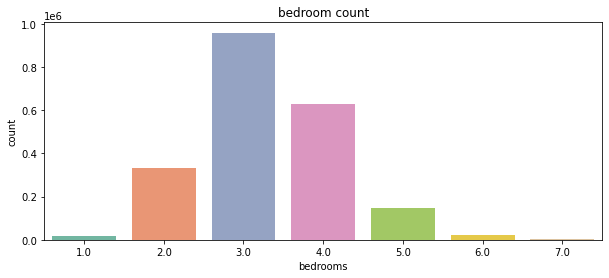

In [26]:
plt.figure(figsize=(10, 4))
sns.set_palette('Set2', 8)
plt.title('bedroom count')
sns.countplot(x = 'bedrooms', data= df)

Text(0.5, 1.0, 'bathroom count')

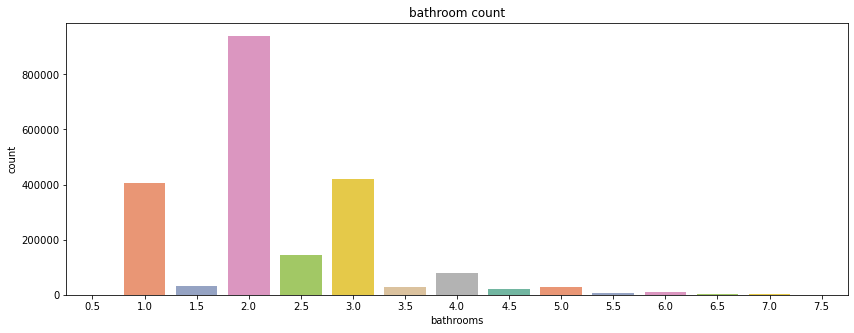

In [27]:
plt.figure(figsize=(14, 5))
sns.set_palette('Set2', 20)
sns.countplot(x='bathrooms', data=df)
plt.title('bathroom count')

In [28]:
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

from math import sqrt
from scipy import stats

In [29]:
# make this a function
train_and_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.3, random_state=123)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1184478 entries, 1341155 to 63651
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   parcelid    1184478 non-null  int64  
 1   bedrooms    1184478 non-null  float64
 2   bathrooms   1184478 non-null  float64
 3   home_size   1184478 non-null  int64  
 4   value       1184478 non-null  int64  
 5   year        1184478 non-null  int64  
 6   tax         1184478 non-null  float64
 7   fips        1184478 non-null  int64  
 8   land_value  1184478 non-null  int64  
 9   lot_size    1184478 non-null  int64  
 10  county      1184478 non-null  object 
 11  latitude    1184478 non-null  object 
 12  longitude   1184478 non-null  object 
dtypes: float64(3), int64(7), object(3)
memory usage: 126.5+ MB


In [31]:
orange_train = train.copy()

In [32]:
ventura_train = train.copy()

In [33]:
la_train = train.copy()

In [35]:
orange_train = orange_train[orange_train.county == 'orange']

In [36]:
orange_train

,parcelid,bedrooms,bathrooms,home_size,value,year,tax,fips,land_value,lot_size,county,latitude,longitude
1988388,13876547,3.0,2.0,1233,196350,1956,2473.32,6059,125568,7300,orange,33.87081,-117.17887411.0
2118924,14192018,4.0,2.0,1847,286622,1970,3541.50,6059,164313,7480,orange,33.892583,-117.17789913.0
1000859,14215564,4.0,2.5,2848,738566,1974,7904.84,6059,563756,14000,orange,33.839723,-117.17800759.0
2054197,14170956,4.0,2.0,1752,74821,1969,1365.12,6059,26780,11000,orange,33.897003,-117.17852274.0
1183654,14502754,3.0,2.5,1758,652805,1998,9602.62,6059,462919,5744,orange,33.649952,-117.17611226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515808,14386067,4.0,2.5,2099,599004,1995,5942.40,6059,347723,5740,orange,33.599387,-117.17732992.0
578738,13943574,3.0,2.0,1205,443671,1959,5435.88,6059,388347,6675,orange,33.763437,-117.17982119.0
1828325,14158437,4.0,2.0,2017,243661,1970,2949.76,6059,76012,5600,orange,33.916138,-117.17879697.0
1732642,14489279,3.0,3.0,1936,615241,1978,6173.68,6059,499931,5412,orange,33.606502,-117.17636240.0


In [37]:
ventura_train = ventura_train[ventura_train.county == 'ventura']

In [38]:
la_train = la_train[la_train.county == 'los_angeles']

In [39]:
ventura_train.to_csv("ventura_locations.csv")
la_train.to_csv("la_locations.csv")
orange_train.to_csv("orange_locations.csv")

In [94]:
ventura_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90679 entries, 1033849 to 549754
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   parcelid    90679 non-null  int64  
 1   bedrooms    90679 non-null  float64
 2   bathrooms   90679 non-null  float64
 3   home_size   90679 non-null  int64  
 4   value       90679 non-null  int64  
 5   year        90679 non-null  int64  
 6   tax         90679 non-null  float64
 7   fips        90679 non-null  int64  
 8   land_value  90679 non-null  int64  
 9   lot_size    90679 non-null  int64  
 10  county      90679 non-null  object 
 11  latitude    90679 non-null  object 
 12  longitude   90679 non-null  object 
dtypes: float64(3), int64(7), object(3)
memory usage: 11.7+ MB


In [54]:
ventura_train['latitude'] = ventura_train.latitude.astype(str)

In [56]:
ventura_train['latitude'].dtype

dtype('O')

In [122]:
ventura_train['latitude'] = np.where(ventura_train['latitude']==' ',0, ventura_train['latitude']).astype(float)

In [124]:
ventura_train['longitude'] = ventura_train.longitude.astype(str)

In [127]:
ventura_train['longitude'] = ventura_train['longitude'].str.rstrip('.0') 

In [128]:
ventura_train['longitude']

1033849    -119.19207912
2045438    -119.19220729
1130383    -119.19028047
1411349    -118.18762283
1120403    -118.18710355
               ...      
1938038    -119.19208389
118735     -119.19164934
1120471    -118.18769013
2089080    -118.18839191
549754     -118.18673452
Name: longitude, Length: 90679, dtype: object

In [129]:
ventura_train['longitude'] = np.where(ventura_train['longitude']==' ',0, ventura_train['longitude']).astype(float)

In [40]:
import geopy

In [135]:
def get_zipcode(ventura_train, geolocator, lat_field, lon_field):
    location = geolocator.reverse((ventura_train['latitude'], ventura_train['longitude']))
    return location.raw['address']['postcode']

geolocator = geopy.Nominatim(user_agent='mlshiben')

In [133]:
ventura_train.get('latitude')

1033849    34.297995
2045438    34.281777
1130383    34.209863
1411349    34.173449
1120403    34.285788
             ...    
1938038    34.188076
118735     34.276843
1120471    34.257785
2089080    34.140747
549754     34.275027
Name: latitude, Length: 90679, dtype: float64

In [137]:
import geocoder

In [151]:
from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=50)

AssertionError: 

In [152]:
def geo_rev(ventura_train):
    g = geocoder.osm([ventura_train.latitude, ventura_train.longitude], method='reverse').json
    if g:
        return g.get('postal')
    else:
        return 'no postal'

ventura_zips = ventura_train[['latitude', 'longitude']].apply(geo_rev, axis=1)


KeyboardInterrupt: 

In [144]:
g = geocoder.osm(ventura_train['latitude'], ventura_train['longitude']), method='reverse')
g.json['postal']

SyntaxError: cannot assign to function call (3582936030.py, line 1)

In [136]:
zipcodes = ventura_train.apply(get_zipcode, geolocator=geolocator, lat_field ='latitude', lon_field = 'longitude')

KeyError: 'latitude'